In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [34]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [3]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# EDA

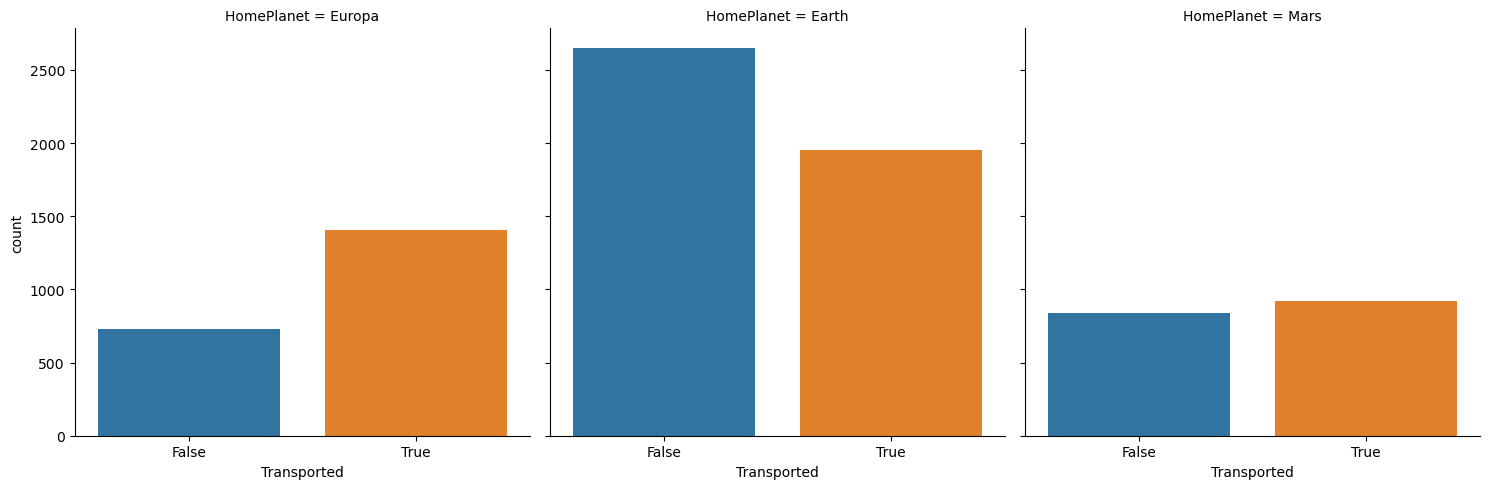

In [4]:
sns.catplot(x='Transported', col='HomePlanet', kind='count', data=df)
plt.show()

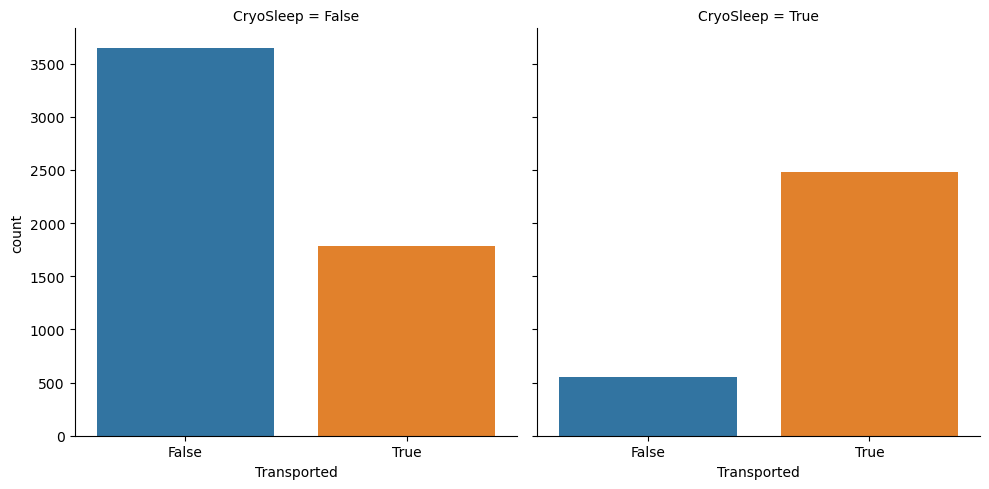

In [5]:
sns.catplot(x='Transported', col='CryoSleep', kind='count', data=df)
plt.show()

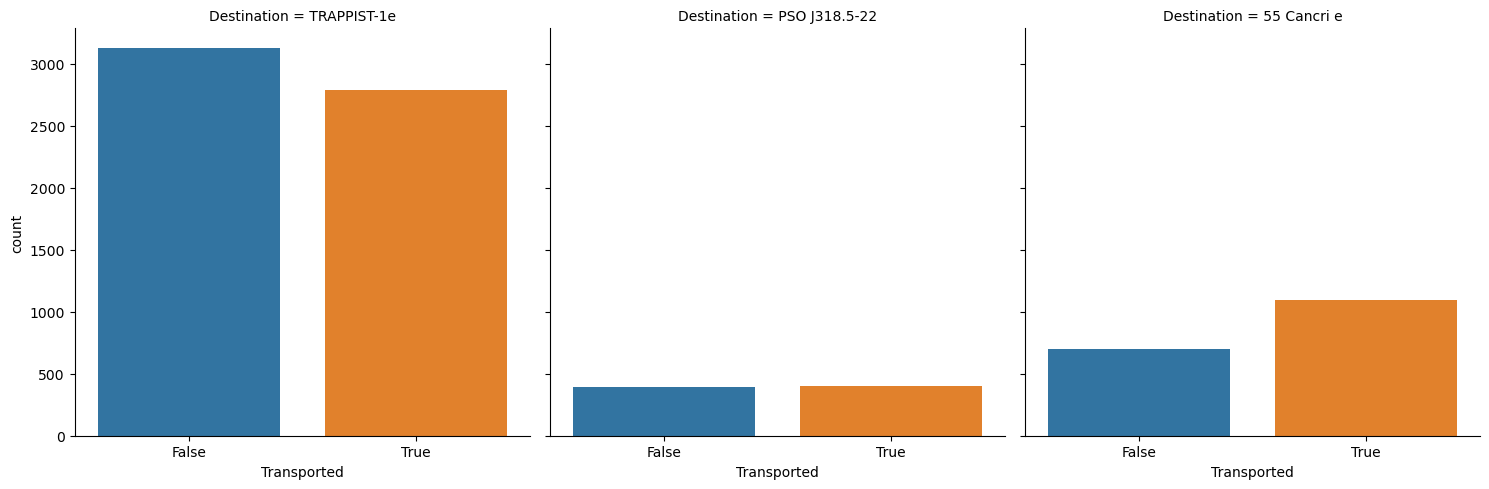

In [6]:
sns.catplot(x='Transported', col='Destination', kind='count', data=df)
plt.show()

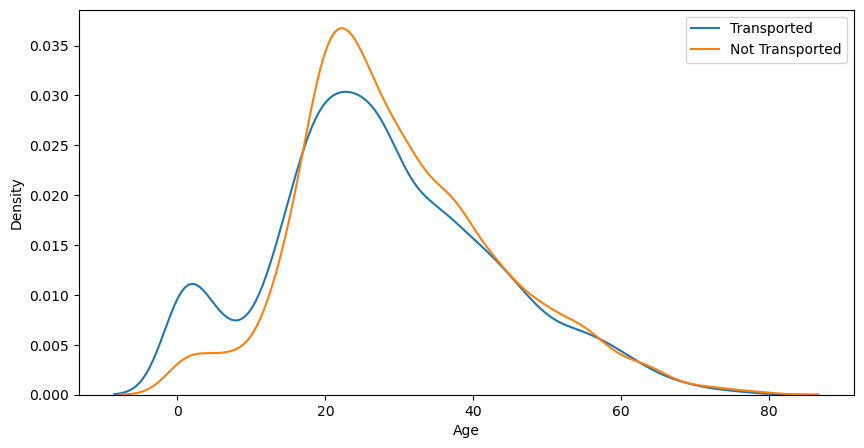

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(x=df[df.Transported == True]['Age'], ax=ax)
sns.kdeplot(x=df[df.Transported == False]['Age'], ax=ax)
plt.legend(['Transported', 'Not Transported'])
plt.show()

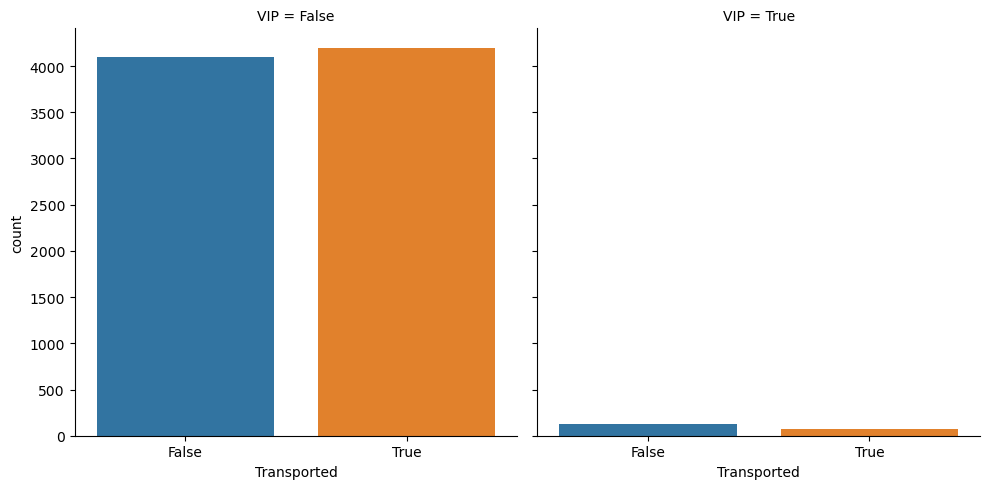

In [8]:
sns.catplot(x='Transported', col='VIP', kind='count', data=df)
plt.show()

# Preprocessing

In [9]:
def plot_cont(colname, except_zero=False):
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    if except_zero:
        sns.kdeplot(df[(df.Transported == True) & (df[colname] > 0)][colname], ax=ax)
        sns.kdeplot(df[(df.Transported == False) & (df[colname] > 0)][colname], ax=ax)
    else:
        sns.kdeplot(x=df[df.Transported == True][colname], ax=ax)
        sns.kdeplot(x=df[df.Transported == False][colname], ax=ax)
    plt.legend(['Transported', 'Not Transported'])
    plt.show()

## Age

나이 결측치 Median으로 대체

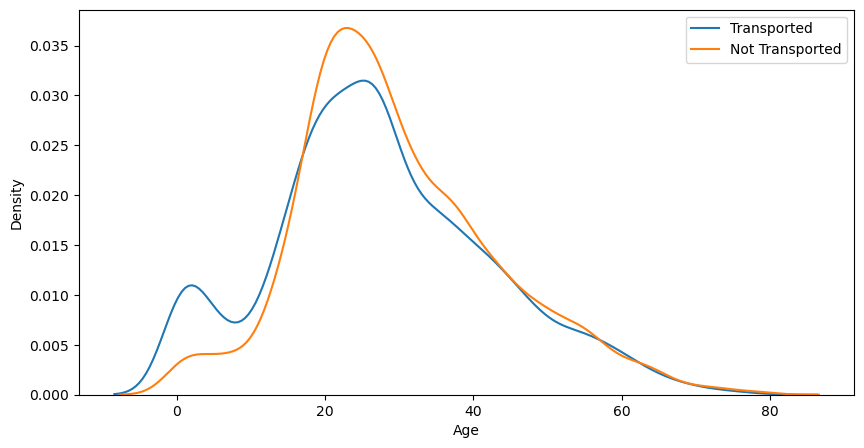

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
plot_cont('Age')

## Amenities

In [11]:
scaler = StandardScaler()
# Subset of columns to transform
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Overwrite old columns with transformed columns
#df[cols] = scaler.fit_transform(df[cols])
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


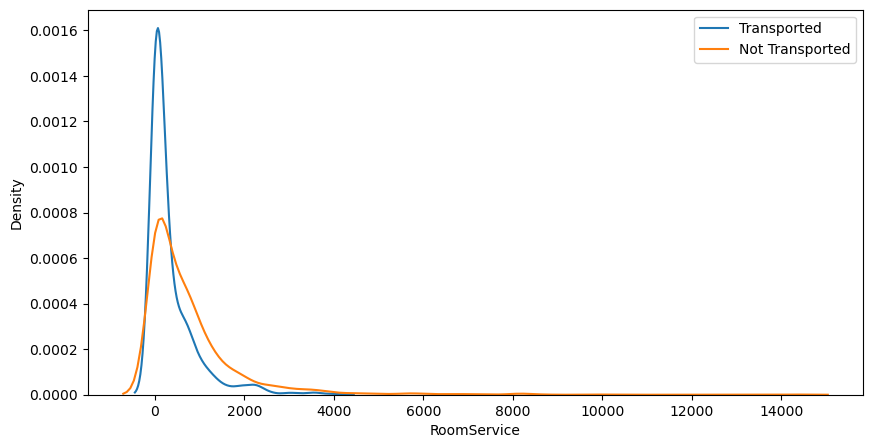

In [12]:
plot_cont("RoomService", True)

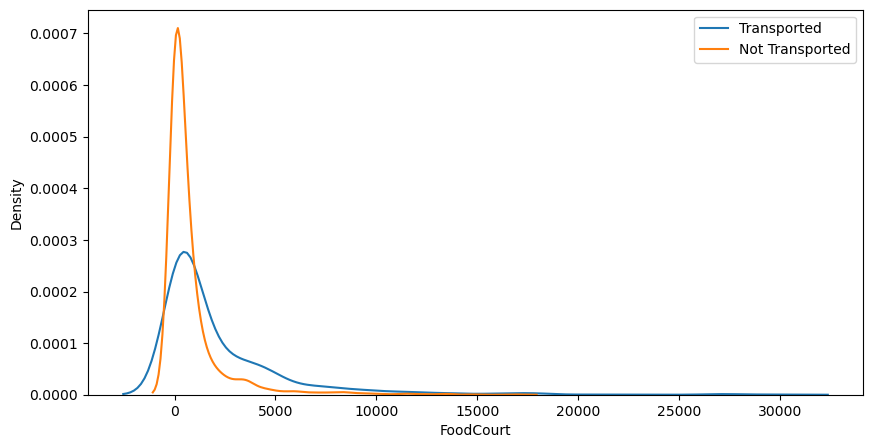

In [13]:
plot_cont("FoodCourt", True)

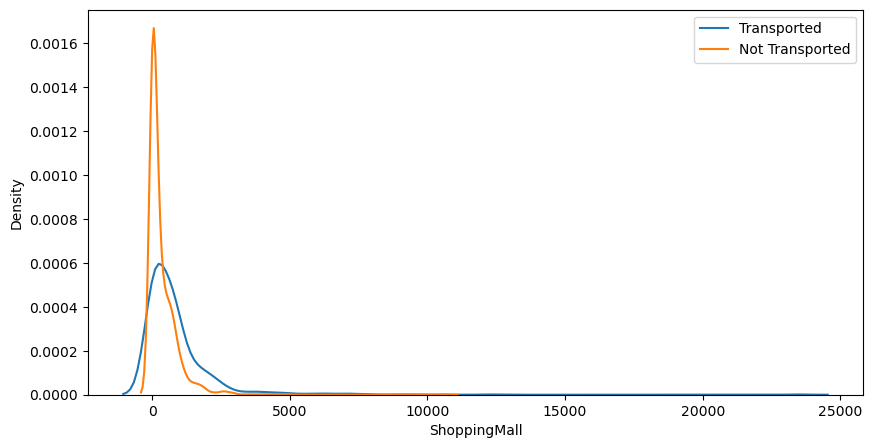

In [14]:
plot_cont("ShoppingMall", True)

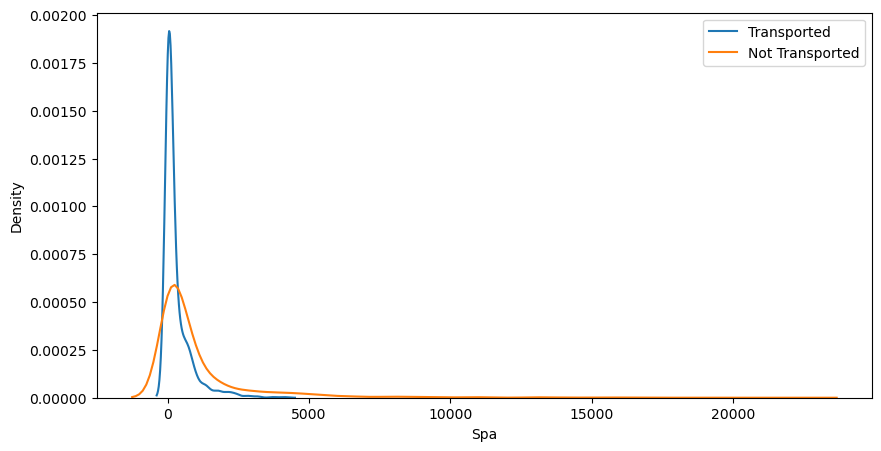

In [15]:
plot_cont("Spa", True)

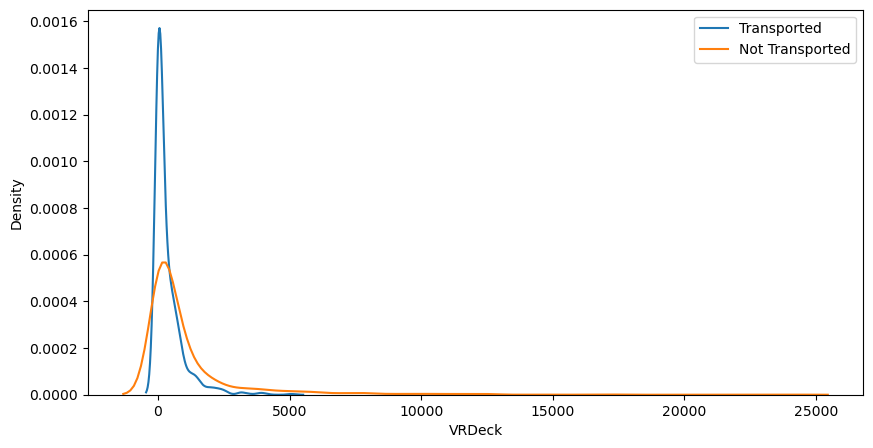

In [16]:
plot_cont("VRDeck", True)

## Cabin

In [17]:
def split_cabin(X):
    X_ = X.copy()
    X_[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = X_['Cabin'].str.split('/', 2, expand=True)
    X_['Cabin_num'] = pd.to_numeric(X_['Cabin_num'])
    return X_

Cabin 칼럼을 각 요소에 따라 분리

In [18]:
df = split_cabin(df)

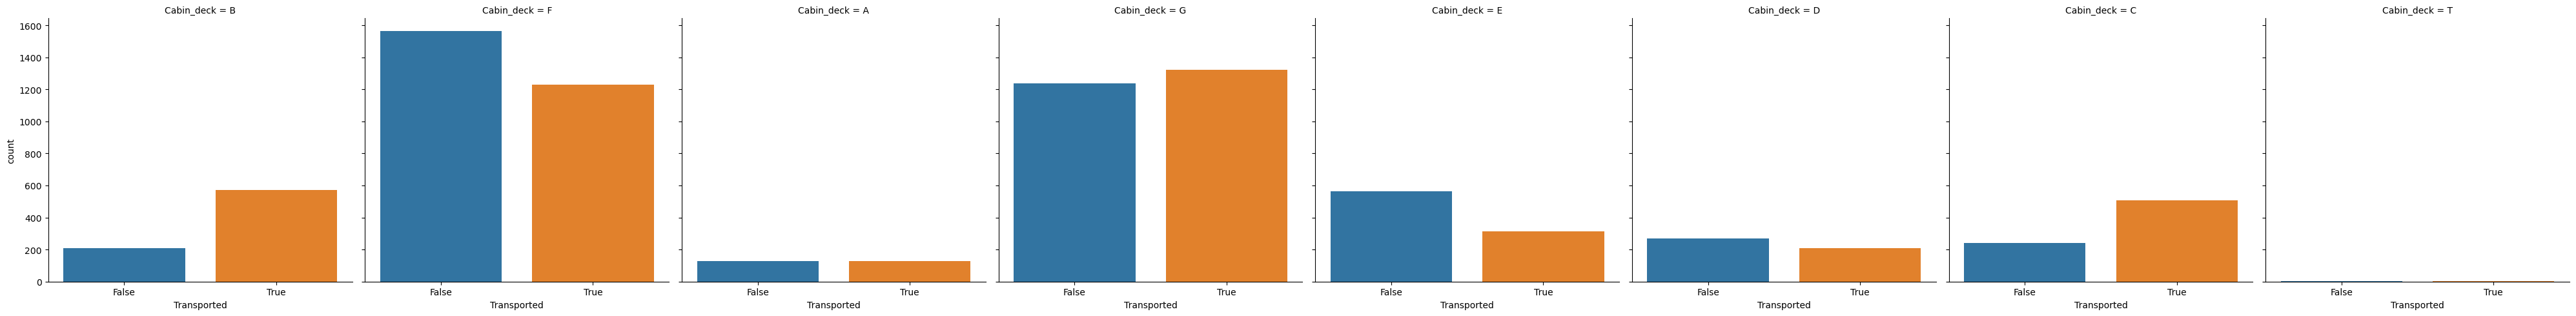

In [19]:
sns.catplot(x='Transported', col='Cabin_deck', kind='count', data=df)
plt.show()

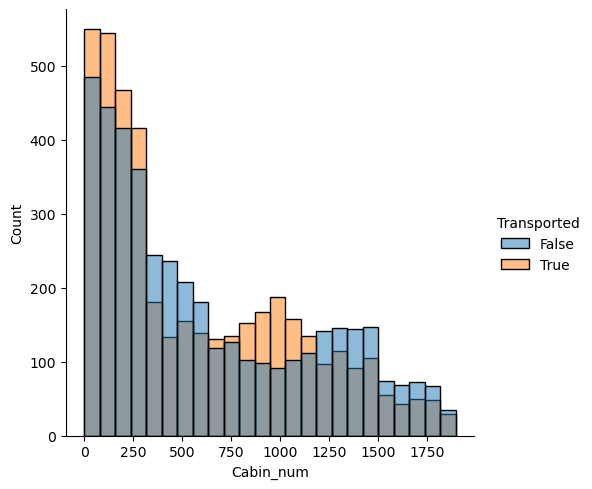

In [20]:
sns.displot(df, x="Cabin_num", hue="Transported")
plt.show()

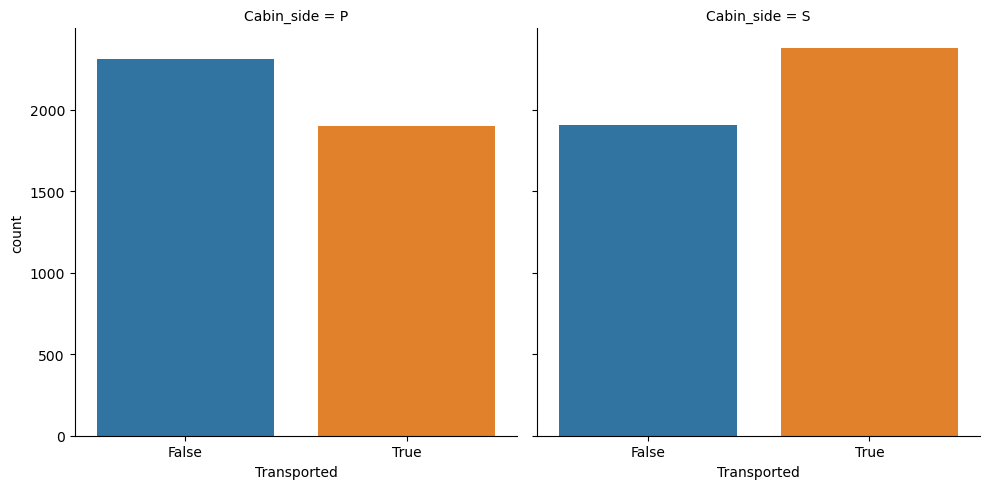

In [21]:
sns.catplot(x='Transported', col='Cabin_side', kind='count', data=df)
plt.show()

## PassengerID

Passenger ID를 group과 group 내 ID로 분리

In [24]:
def split_passenger(X):
    X_ = X.copy()
    X_[['Passenger_group', 'Passenger_id_in_group']] = X_['PassengerId'].str.split('_', 1, expand=True)
    X_['Passenger_group'] = pd.to_numeric(X_['Passenger_group'])
    X_['Passenger_id_in_group'] = pd.to_numeric(X_['Passenger_id_in_group'])
    return X_

In [25]:
df = split_passenger(df)

In [29]:
num_per_group = df.groupby(['Passenger_group'])['Passenger_id_in_group'].count()
num_per_group[num_per_group > 1]

Passenger_group
3       2
6       2
8       3
17      2
20      6
       ..
9252    2
9267    2
9272    2
9275    3
9280    2
Name: Passenger_id_in_group, Length: 1412, dtype: int64